# Neural Networks for Handwritten Digit Recognition, Multiclass
use a neural network to recognize the hand-written digits 0-9.


In [42]:
# Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
np.set_printoptions(precision=2)

In [43]:
# display_digit function
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    widgvis(fig)
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

In [44]:
# display_errors function
def display_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
        widgvis(fig)

        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((20,20)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))

### Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.


In [45]:
# load dataset
X = np.load(r'D:\Machine Learning\Projects\Neural Networks for Handwritten Digit Recognition, Multiclass\Dataset\X.npy')
y = np.load(r'D:\Machine Learning\Projects\Neural Networks for Handwritten Digit Recognition, Multiclass\Dataset\y.npy')

In [46]:
# View the variables
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [47]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [48]:
# Check the dimensions of your variables
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


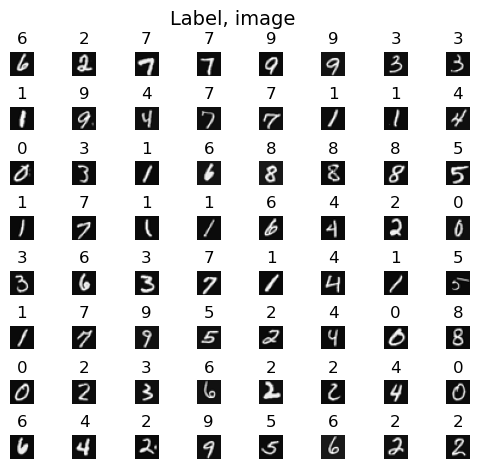

In [49]:
# Visualizing the Data
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

<a name="4.3"></a>
### Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs. 

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention: 
               

<a name="4.4"></a>
### Tensorflow Model Implementation


Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below. 
>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(400,)),    #specify input shape`  
We will include that here to illuminate some model sizing.

<a name="4.5"></a>
### Softmax placement
As described in the lecture and the optional softmax lab, numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer should use a 'linear' activation. This is effectively no activation. 
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

In [50]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
        
        ### END CODE HERE ### 
             ], name = "my_model" 
)

In [51]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [52]:
[layer1, layer2, layer3] = model.layers

In [53]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


The following code:
* defines a loss function, `SparseCategoricalCrossentropy` and indicates the softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.

In [54]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.5026
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.5635
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3943
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3221
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2807
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2519
Epoch 7/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2295
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2123
Epoch 9/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1995
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1821
Epoch 11/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1712
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1611
Epoch 13/40
157/157 [====

#### Epochs and batches
In the `compile` statement above, the number of `epochs` was set to 100. This specifies that the entire data set should be applied during training 100 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/100
157/157 [==============================] - 0s 1ms/step - loss: 2.2770
```
The first line, `Epoch 1/100`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 5000 examples in our data set or roughly 157 batches. The notation on the 2nd line `157/157 [====` is describing which batch has been executed.

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[index] contains an image of a number.

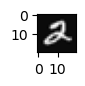

1/1 [==============================] - 0s 48ms/step
 predicting a Two: 
[[ -2.55 -11.12  10.09  -1.27 -12.65  -6.66  -9.79  -3.51   1.72  -0.77]]
 Largest Prediction index: 2


In [55]:
image_of_number = X[1000]
display_digit(image_of_number)

prediction = model.predict(image_of_number.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

The largest output is prediction[number], indicating the predicted digit is a 'number'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [56]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Number. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Number. Probability vector: 
[[3.25e-06 6.19e-10 1.00e+00 1.17e-05 1.34e-10 5.35e-08 2.33e-09 1.25e-06
  2.33e-04 1.92e-05]]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [57]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


Let's compare the predictions vs the labels for a random sample of 64 digits.

1/1 [==============================] - 0s 19ms/step


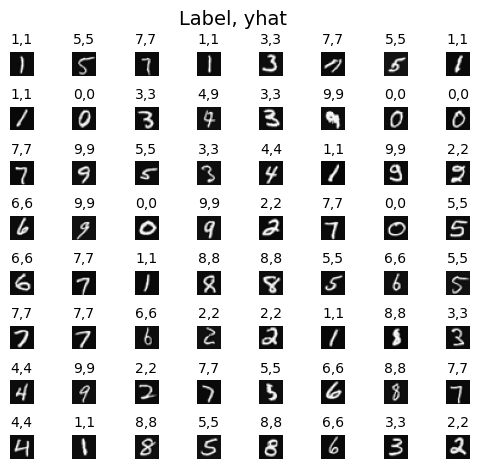

In [58]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

Let's look at some of the errors. 
>Note: increasing the number of training epochs can eliminate the errors on this data set.

1/1 [==============================] - 0s 25ms/step
29 errors out of 5000 images


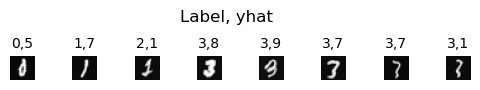

In [59]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")